## Numpy discrete filter

Pure numpy implementation of a discrete filter.
Simple highpass and lowpass filters shown.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 100_000
T_f = 1
t = np.linspace(0,T_f,N)

In [3]:
y = np.sin(t*np.pi*2*10) + np.sin(t*np.pi*2*100)

In [4]:
#Simple discrete lowpass filter
def filt(x,alpha):
    x_filt = np.zeros(len(x))
    x_filt[0] = x[0]
    for i in range(1,len(x)):
        x_filt[i] = alpha*x[i] + (1-alpha)*x_filt[i-1]
    return x_filt

#Simple discrete highpass filter
def filt_hpf(x,alpha):
    x_filt = np.zeros(len(x))
    x_filt[0] = x[0]
    for i in range(1,len(x)):
        x_filt[i] = (1-alpha)*x_filt[i-1] + (1-alpha)*(x[i] - x[i-1])
    return x_filt

In [5]:
#2nd order
def filt2(x,alpha):
    x_filt = np.zeros(len(x))
    x_filt[0] = x[0]
    x_filt[1] = alpha*x[1]+(1-alpha)*x[0]
    for i in range(2,len(x)):
        x_filt[i] = alpha**2*x[i] + 2*(1-alpha)*x_filt[i-1] - (1-alpha)**2*x_filt[i-2]
    return x_filt

#2nd order highpass filter
def filt_hpf2(x,alpha):
    x_filt = np.zeros(len(x))
    x_filt[0] = x[0]
    x_filt[1] = (1-alpha)*x[0] + (1-alpha)*(x[1]-x[0])
    for i in range(2,len(x)):
        x_filt[i] = (1-alpha)**2*(x[i] - 2*x[i-1] + x[i-2]) + 2*(1-alpha)*x_filt[i-1] - (1-alpha)**2*x_filt[i-2]
    return x_filt

In [6]:
filt_freq = 30
delta_t = (T_f/N)
alpha = 2*np.pi*filt_freq*delta_t/(2*np.pi*filt_freq*delta_t + 1)

yfilt = filt2(y,alpha)
yfilt2 = filt_hpf2(y,alpha)

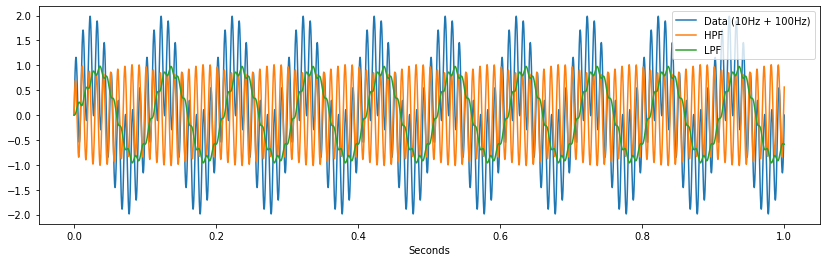

In [7]:
plt.figure(figsize=(14,4))
plt.plot(t,y,label='Data (10Hz + 100Hz)')
plt.plot(t,yfilt2,label='HPF')
plt.plot(t,yfilt,label='LPF')
plt.xlabel("Seconds")
plt.legend(loc='upper right')